In [99]:
# importing dependencies 

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 
from tensorflow.python.framework import ops

%matplotlib inline

## Visualize dataframe

In [100]:
# importing data using pandas 
dfz = pd.read_excel('BTC daily_database.xlsx', sheet_name=0)
# testing the input is correct or not
print(dfz.head())

        Date  Price       RSI  Stedev from 20 MA  MACD n.f  50MA_N.F.  \
0 2011-12-16   3.25  0.514151           0.591527  1.594689   0.500194   
1 2011-12-18   3.25  0.443243           0.516482  1.489778   0.571086   
2 2011-12-19   3.50  0.511962           1.311777  1.473728   1.266368   
3 2011-12-20   4.75  0.822695           3.461711  1.840524   3.831441   
4 2011-12-21   4.38  0.753247           2.180044  1.969366   2.760808   

   20D PMO  35D PMO        ADX  actions  y-hat  Unnamed: 11  Unnamed: 12  
0    3.270     0.59  69.772809      NaN      2            1  2157.000000  
1    3.690     0.46  70.038037      NaN      2            1     0.912437  
2    4.275     0.67  70.475308      NaN      2            1          NaN  
3    5.140     1.55  68.503186      NaN      2            1          NaN  
4    5.910     1.28  66.671929      NaN      2            1          NaN  


## Randomize sampling

In [101]:
# shuffler() will read the data and randomly organizes it 
def shuffler(filename):
  # Read an Excel table into a pandas DataFrame
  # takes the first sheet and header
    
  dfs = pd.read_excel(filename, sheet_name=0, header=0)
  # return the pandas dataframe
  # np.random.permutation shuffles the data points 
  # dfs will clean the data by placing NaN at x-features that have no data 
  return dfs.reindex(np.random.permutation(dfs.index))

In [102]:
# randomizes the data and saves it in df
df = shuffler('BTC daily_database.xlsx')

# prints the first 5 rows of the data table
print(df.head())

           Date   Price       RSI  Stedev from 20 MA  MACD n.f  50MA_N.F.  \
1150 2015-02-12  219.57  0.399169          -0.873047  0.563349  -0.860818   
1629 2016-06-05  573.50  0.942302           1.838162  3.274190   3.090902   
1618 2016-05-25  445.31  0.438697          -0.792822 -1.523812   0.139452   
1259 2015-06-01  228.91  0.376727          -2.390296  0.143606  -0.589569   
1292 2015-07-04  256.06  0.629606           1.151252  1.678114   1.818851   

      20D PMO  35D PMO        ADX  actions  y-hat  Unnamed: 11  Unnamed: 12  
1150   -5.770    -0.25  14.065588      NaN      2            1          NaN  
1629    2.795     0.74  22.560415      NaN      2            1          NaN  
1618    2.010     0.08  23.781133      NaN      2            1          NaN  
1259    0.890     0.14  12.595896      NaN      2            1          NaN  
1292    1.410     0.25  22.460306      NaN      2            1          NaN  


## Input dataframe

In [103]:
# converts to numpy array using as_matrix()
# use iloc() to get location 
inputX = df.iloc[:,2:9 ].as_matrix()

# transposes inputX
inputX = inputX.T

# converts to numpy array using as_matrix()
# use iloc() to get location 
inputY = df.iloc[:, 10:11].as_matrix()

# transposes inputY
inputY = inputY.T

print("inputX shape: " + str(inputX.shape))
print("number of training samples = "+ str(inputX.shape[1]))
print("number of variables = " + str(inputX.shape[0]))
print(inputX)
print(inputY.shape)

inputX shape: (7, 2363)
number of training samples = 2363
number of variables = 7
[[  0.39916891   0.94230249   0.4386969  ...,   0.4886549    0.19231986
    0.44992168]
 [ -0.8730465    1.83816229  -0.79282237 ...,  -0.34316117  -2.10832909
   -0.44035867]
 [  0.56334933   3.27418961  -1.52381183 ...,  -0.16408034  -1.17574032
   -0.35103279]
 ..., 
 [ -5.77         2.795        2.01       ...,   1.37        -2.345       11.95      ]
 [ -0.25         0.74         0.08       ...,   0.08        -0.64         1.16      ]
 [ 14.06558832  22.56041505  23.7811327  ...,  29.69269452  40.04025313
   37.2778517 ]]
(1, 2363)


In [104]:
inputY

array([[2, 2, 2, ..., 2, 2, 2]])

## Seperating to train and test datasets

In [105]:
# selects trainning data 
trainX = inputX[:, : -470]
trainY = inputY[:, : -470]

# selects test data 
testX = inputX[:, -470: ]
testY = inputY[:, -470: ]

# verifies the shapes 
print("trainX's shape: " + str(trainX.shape))
print("testX's shape: " + str(testX.shape))
print("trainX's shape: " + str(trainY.shape))
print("testY's shape: " + str(testY.shape))


trainX's shape: (7, 1893)
testX's shape: (7, 470)
trainX's shape: (1, 1893)
testY's shape: (1, 470)


## Layer size inputs 

In [106]:
# size of input layer
n_x = inputX.shape[0]

# amount of neuron for first hidden layer
n_h = 80

# output layer 
n_y = inputY.shape[0]

print("n_x's shape = " + str(n_x))
print("first layer(n_h)'s shape = " + str(n_h))
print("n_y's output = " + str(n_y))

n_x's shape = 7
first layer(n_h)'s shape = 80
n_y's output = 1


## Create placeholder


In [108]:
# Creates the placeholders for the tensorflow session.
def create_placeholders(n_x, n_y):
    
    # creates placholder for x and y that batch size can be any size
    X = tf.placeholder(tf.float32, shape = [n_x,None])
    Y = tf.placeholder(tf.float32, shape = [n_y, 1, None])  
    return X, Y

In [109]:
X, Y = create_placeholders(n_x,n_y)
print ("X = " + str(X))
print(X.shape)
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(7, ?), dtype=float32)
(7, ?)
Y = Tensor("Placeholder_3:0", shape=(1, 1, ?), dtype=float32)


## Initialize parameters

In [110]:
#  Initializes weight parameters to build a neural network with tensorflow  
def initialize_parameters(n_x, n_h):
    #tf.set_random_seed()
    
    # Layer 1 (Input Layer)
    W1 = tf.get_variable("W1", [n_h,n_x], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b1 = tf.get_variable("b1", [n_h,1], initializer = tf.zeros_initializer())
    
    # Layer 2 (10 neurons)
    W2 = tf.get_variable("W2", [40, n_h], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b2 = tf.get_variable("b2", [40, 1], initializer = tf.zeros_initializer())
    
    # Layer 3 (25 neurons)
    W3 = tf.get_variable("W3", [20, 40], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b3 = tf.get_variable("b3", [20, 1], initializer = tf.zeros_initializer())
    
    # Layer 4 (10 neurons)
    W4 = tf.get_variable("W4", [10, 20], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b4 = tf.get_variable("b4", [10,1], initializer = tf.zeros_initializer())
    
    # Layer 5 (5 neurons)
    W5 = tf.get_variable("W5", [5, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b5 = tf.get_variable("b5", [5,1], initializer = tf.zeros_initializer())
    
    # Layer 6 (5 neurons)
#     W6 = tf.get_variable("W6", [5, 5], initializer=tf.contrib.layers.xavier_initializer(seed=0))
#     b6 = tf.get_variable("b6", [5,1], initializer = tf.zeros_initializer())
    #W7 = tf.get_variable("W7", [5, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    #b7 = tf.get_variable("b7", [5,1], initializer = tf.zeros_initializer())
    
    # saves weights and bias for layers as a dictionary 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5}
#                   "W6": W6,
#                   "b6": b6}
                  #"W7": W7,
                  #"b7": b7}

    return parameters

In [111]:
# Checking the shape of the weights and bias 
tf.reset_default_graph()

with tf.Session() as sess:
    parameters = initialize_parameters(n_x, n_h)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))
    print("W4 = " + str(parameters["W4"]))
    print("b4 = " + str(parameters["b4"]))
    print("W5 = " + str(parameters["W5"]))
    print("b5 = " + str(parameters["b5"]))
#     print("W6 = " + str(parameters["W6"]))
#     print("b6 = " + str(parameters["b6"]))
    #print("W7 = " + str(parameters["W7"]))
    #print("b7 = " + str(parameters["b7"]))

W1 = <tf.Variable 'W1:0' shape=(80, 7) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(80, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(40, 80) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(40, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(20, 40) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(20, 1) dtype=float32_ref>
W4 = <tf.Variable 'W4:0' shape=(10, 20) dtype=float32_ref>
b4 = <tf.Variable 'b4:0' shape=(10, 1) dtype=float32_ref>
W5 = <tf.Variable 'W5:0' shape=(5, 10) dtype=float32_ref>
b5 = <tf.Variable 'b5:0' shape=(5, 1) dtype=float32_ref>


## One hot matrix

In [112]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name = "C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices = labels, depth = C,axis  =0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    return one_hot

In [113]:
# Testing one_hot
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


## Convert Y-hat to softmax matrix

In [114]:
# use one_hot on trainY and testY
trainY = one_hot_matrix(trainY, C = 5)
testY = one_hot_matrix(testY, C = 5)

print("Y = ")
print(trainY)

print("trainY-shape = " + str(trainY.shape))
print("testY-shape = " + str(testY.shape))

Y = 
[[[ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]]]
trainY-shape = (5, 1, 1893)
testY-shape = (5, 1, 470)


## Forward Propagation

In [115]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3", "W4", "b4"
                  the shapes are given in initialize_parameters

    Returns:
    Z4 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5'] 
#     W6 = parameters['W6']
#     b6 = parameters['b6'] 
    #W7 = parameters['W7']
    #b7 = parameters['b7'] 
    
    # Input Layer (Sigmoid)
    Z1 = tf.add(tf.matmul(W1,X) , b1)
    A1 = tf.nn.tanh(Z1)
    
    # 1st Hidden Layer (Sigmoid)
    Z2 = tf.add(tf.matmul(W2,A1), b2 )  
    dropout1 = tf.nn.dropout(Z2, keep_prob = 0.5)
    A2 = tf.nn.sigmoid(dropout1)
    
    # 2nd Hidden Layer (Selu)
    Z3 = tf.add(tf.matmul(W3,A2), b3)
    dropout2 = tf.nn.dropout(Z3, keep_prob = 0.7)
    A3 = tf.nn.selu(dropout2) 
    
    # 3rd Hidden Layer (Selu)
    Z4 = tf.add(tf.matmul(W4,A3), b4)    
    dropout3 = tf.nn.dropout(Z4, keep_prob = 1)
    A4 = tf.nn.selu(dropout3)             
    
    # 4th Hidden Layer (tanh)
    Z5 = tf.add(tf.matmul(W5,A4), b5)
#     dropout4 = tf.nn.dropout(Z5, keep_prob = 1)
#     A5 = tf.nn.tanh(Z5)  
    
#     # Output Layer
#     Z6 = tf.add(tf.matmul(W6,A5), b6)                                 
    #A6 = tf.nn.relu(Z6)                                              
    #Z7 = tf.add(tf.matmul(W7,A6), b7)                                
    return Z5
    

## Compute Cost

In [116]:
def compute_cost(Z, Y):
    """
    Computes the cost
    
    Arguments:
    Z4 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z4
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z)
    labels = tf.transpose(Y)
    
    #compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [117]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(4, 1)
    parameters = initialize_parameters(4,1)
    Z1 = forward_propagation(X, parameters)
    cost = compute_cost(Z1, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


## Creating Mini-batches

In [118]:

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    #permutation = list(np.random.permutation(m))
    #shuffled_X = X[:, permutation]
    #shuffled_Y = Y[:, 1, permutation]
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = Y[:,:, k*mini_batch_size : (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch_Y = Y[:,:, num_complete_minibatches*mini_batch_size : m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [119]:
mini_batches = random_mini_batches(trainX, trainY, 64, seed=0)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the last mini_batch_X: " + str(mini_batches[-1][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("shape of the last mini_batch_Y: " + str(mini_batches[-1][1].shape))
#print ("mini batch sanity check: ")
#mini_batches[0][1]


shape of the 1st mini_batch_X: (7, 64)
shape of the 2nd mini_batch_X: (7, 64)
shape of the 3rd mini_batch_X: (7, 64)
shape of the last mini_batch_X: (7, 37)
shape of the 1st mini_batch_Y: (5, 1, 64)
shape of the 2nd mini_batch_Y: (5, 1, 64)
shape of the 3rd mini_batch_Y: (5, 1, 64)
shape of the last mini_batch_Y: (5, 1, 37)


## Building the model 

In [120]:
def model(trainX, trainY, testX, testY, learning_rate = 0.0013,
          num_epochs = 2200, minibatch_size = 64, print_cost = True, beta = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = trainX.shape                                # (n_x: input size, m : number of examples in the train set)
    n_y = trainY.shape[0]                                  # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h)

    # Getting Weights for Regularization 
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
#     W6 = parameters['W6']
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z = forward_propagation(X, parameters)
    
    # Regularization Term For Cost Function
    regularizers = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3) + tf.nn.l2_loss(W4) + tf.nn.l2_loss(W5)

    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z,Y) + (beta * regularizers)
    
#     # Cost function: Add cost function to tensorflow graph
#     cost = compute_cost(Z,Y)
#     print(parameters)

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1 , beta2 = beta2, epsilon = epsilon ).minimize(cost)

#      STACK OVERFLOW
#     optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1 , beta2 = beta2, epsilon = epsilon )
#     gvs = optimizer.compute_gradients(cost)
#     capped_gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
#     train_op = optimizer.apply_gradients(capped_gvs)


#     optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#     grads_and_vars = optimizer.compute_gradients(cost)
#     capped_gvs = [(tf.clip_by_value(grad, -1, 1), var) for grad, var in grads_and_vars]
#     training_op = optimizer.apply_gradients(capped_gvs)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:

        # Run the initialization
        sess.run(init)

        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(trainX, trainY, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch

                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Train Accuracy:", accuracy.eval({X: trainX, Y: trainY}))
        print ("Test Accuracy:", accuracy.eval({X: testX, Y: testY}))
        return parameters

Cost after epoch 0: 1.134870
Cost after epoch 100: 0.430407
Cost after epoch 200: 0.425582
Cost after epoch 300: 0.418195
Cost after epoch 400: 0.420549
Cost after epoch 500: 0.418197
Cost after epoch 600: 0.410561
Cost after epoch 700: 0.420113
Cost after epoch 800: 0.415333
Cost after epoch 900: 0.415182
Cost after epoch 1000: 0.420517
Cost after epoch 1100: 0.420435
Cost after epoch 1200: 0.412615
Cost after epoch 1300: 0.413969
Cost after epoch 1400: 0.419511
Cost after epoch 1500: 0.413138
Cost after epoch 1600: 0.414779
Cost after epoch 1700: 0.417415
Cost after epoch 1800: 0.416352
Cost after epoch 1900: 0.412446
Cost after epoch 2000: 0.412041
Cost after epoch 2100: 0.416568


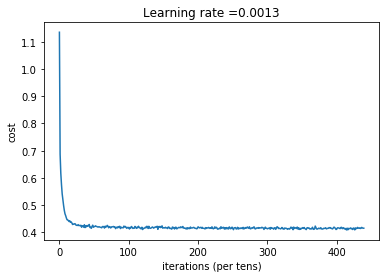

Parameters have been trained!
Train Accuracy: 0.910195
Test Accuracy: 0.923404


In [26]:
# Testing Adam Optimize with beta1, beta2, epsilon
parameters = model(trainX, trainY, testX,testY, beta = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

In [53]:
# beta 0.01 with only reg term 
parameters = model(trainX, trainY, testX,testY, beta = 0.01)

NameError: name 'beat2' is not defined

Cost after epoch 0: 1.269552
Cost after epoch 100: 0.438901
Cost after epoch 200: 0.431193
Cost after epoch 300: 0.428889
Cost after epoch 400: 0.427879
Cost after epoch 500: 0.427350
Cost after epoch 600: 0.427041
Cost after epoch 700: 0.426856
Cost after epoch 800: 0.426739
Cost after epoch 900: 0.426653
Cost after epoch 1000: 0.426590
Cost after epoch 1100: 0.426545
Cost after epoch 1200: 0.426508
Cost after epoch 1300: 0.426476
Cost after epoch 1400: 0.426446
Cost after epoch 1500: 0.426416
Cost after epoch 1600: 0.426381
Cost after epoch 1700: 0.426339
Cost after epoch 1800: 0.426285
Cost after epoch 1900: 0.426209
Cost after epoch 2000: 0.426122
Cost after epoch 2100: 0.426056


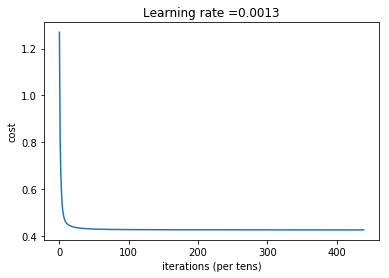

Parameters have been trained!
Train Accuracy: 0.913365
Test Accuracy: 0.910638


In [37]:
# beta 0.02 with only reg term 
parameters = model(trainX, trainY, testX,testY, beta = 0.02)

Cost after epoch 0: 1.572870
Cost after epoch 100: 0.438955
Cost after epoch 200: 0.430509
Cost after epoch 300: 0.428240
Cost after epoch 400: 0.427377
Cost after epoch 500: 0.426973
Cost after epoch 600: 0.426761
Cost after epoch 700: 0.426644
Cost after epoch 800: 0.426567
Cost after epoch 900: 0.426508
Cost after epoch 1000: 0.426455
Cost after epoch 1100: 0.426406
Cost after epoch 1200: 0.426356
Cost after epoch 1300: 0.426285
Cost after epoch 1400: 0.426180
Cost after epoch 1500: 0.426084
Cost after epoch 1600: 0.426054
Cost after epoch 1700: 0.426055
Cost after epoch 1800: 0.426054
Cost after epoch 1900: 0.426054
Cost after epoch 2000: 0.426055
Cost after epoch 2100: 0.426056


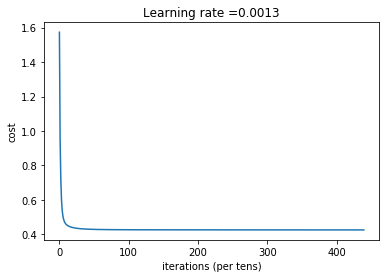

Parameters have been trained!
Train Accuracy: 0.913365
Test Accuracy: 0.910638


In [38]:
# beta 0.03 with only reg term 
parameters = model(trainX, trainY, testX,testY, beta = 0.03)

Cost after epoch 0: 2.173413
Cost after epoch 100: 0.438185
Cost after epoch 200: 0.429141
Cost after epoch 300: 0.427324
Cost after epoch 400: 0.426782
Cost after epoch 500: 0.426570
Cost after epoch 600: 0.426464
Cost after epoch 700: 0.426395
Cost after epoch 800: 0.426309
Cost after epoch 900: 0.426179
Cost after epoch 1000: 0.426066
Cost after epoch 1100: 0.426066
Cost after epoch 1200: 0.426058
Cost after epoch 1300: 0.426054
Cost after epoch 1400: 0.426060
Cost after epoch 1500: 0.426055
Cost after epoch 1600: 0.426054
Cost after epoch 1700: 0.426054
Cost after epoch 1800: 0.426061
Cost after epoch 1900: 0.426054
Cost after epoch 2000: 0.426054
Cost after epoch 2100: 0.426054


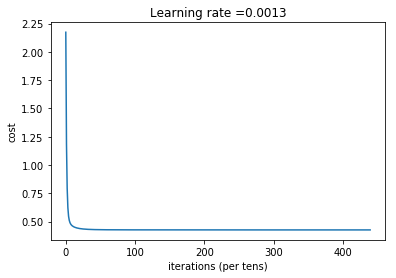

Parameters have been trained!
Train Accuracy: 0.913365
Test Accuracy: 0.910638


In [39]:
# beta 0.05 with only reg term 
parameters = model(trainX, trainY, testX,testY, beta = 0.05)

Cost after epoch 0: 1.529969
Cost after epoch 100: 0.442388
Cost after epoch 200: 0.440493
Cost after epoch 300: 0.440138
Cost after epoch 400: 0.440027
Cost after epoch 500: 0.439971
Cost after epoch 600: 0.439913
Cost after epoch 700: 0.439854
Cost after epoch 800: 0.439825
Cost after epoch 900: 0.439835
Cost after epoch 1000: 0.439823
Cost after epoch 1100: 0.439823
Cost after epoch 1200: 0.439823
Cost after epoch 1300: 0.439823
Cost after epoch 1400: 0.439823
Cost after epoch 1500: 0.439823
Cost after epoch 1600: 0.439823
Cost after epoch 1700: 0.439823
Cost after epoch 1800: 0.439823
Cost after epoch 1900: 0.439823
Cost after epoch 2000: 0.439823
Cost after epoch 2100: 0.439822
Cost after epoch 2200: 0.439823
Cost after epoch 2300: 0.439822
Cost after epoch 2400: 0.439824
Cost after epoch 2500: 0.439823
Cost after epoch 2600: 0.439822
Cost after epoch 2700: 0.439823
Cost after epoch 2800: 0.439822
Cost after epoch 2900: 0.439822
Cost after epoch 3000: 0.439822
Cost after epoch 310

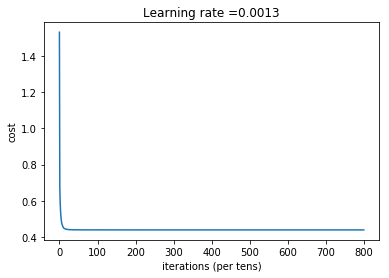

Parameters have been trained!
Train Accuracy: 0.910195
Test Accuracy: 0.923404


In [40]:
# Testing 1 more layer and epoch 4000
parameters = model(trainX, trainY, testX,testY, num_epochs = 4000, beta = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 1.168070
Cost after epoch 100: 0.417950
Cost after epoch 200: 0.409703
Cost after epoch 300: 0.405089
Cost after epoch 400: 0.406376
Cost after epoch 500: 0.403377
Cost after epoch 600: 0.410292
Cost after epoch 700: 0.406840
Cost after epoch 800: 0.402534
Cost after epoch 900: 0.404937
Cost after epoch 1000: 0.401748
Cost after epoch 1100: 0.403970
Cost after epoch 1200: 0.404006
Cost after epoch 1300: 0.410201
Cost after epoch 1400: 0.400073
Cost after epoch 1500: 0.404436
Cost after epoch 1600: 0.405042
Cost after epoch 1700: 0.402073
Cost after epoch 1800: 0.400594
Cost after epoch 1900: 0.402198
Cost after epoch 2000: 0.403954
Cost after epoch 2100: 0.401653


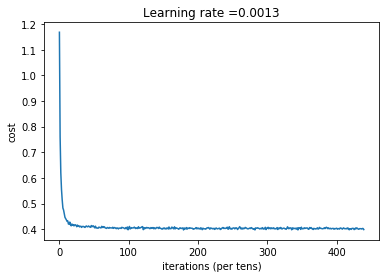

Parameters have been trained!
Train Accuracy: 0.910195
Test Accuracy: 0.923404


In [50]:
# Testing diff layer 80, 40, 20, 10,5
parameters = model(trainX, trainY, testX,testY, beta = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 1.160100
Cost after epoch 100: 0.421098
Cost after epoch 200: 0.412362
Cost after epoch 300: 0.409683
Cost after epoch 400: 0.405475
Cost after epoch 500: 0.408968
Cost after epoch 600: 0.410374
Cost after epoch 700: 0.410059
Cost after epoch 800: 0.406624
Cost after epoch 900: 0.410154
Cost after epoch 1000: 0.402264
Cost after epoch 1100: 0.405278
Cost after epoch 1200: 0.403356
Cost after epoch 1300: 0.406175
Cost after epoch 1400: 0.407607
Cost after epoch 1500: 0.409780
Cost after epoch 1600: 0.401186
Cost after epoch 1700: 0.409262
Cost after epoch 1800: 0.405710
Cost after epoch 1900: 0.405910
Cost after epoch 2000: 0.406152
Cost after epoch 2100: 0.402539


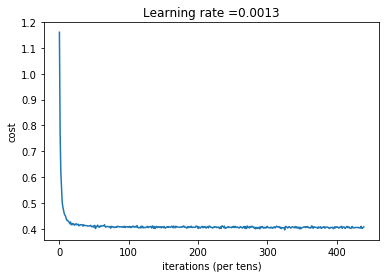

Parameters have been trained!
Train Accuracy: 0.909139
Test Accuracy: 0.92766


In [121]:
# Testing diff layer 40, 40, 40, 40, 40
parameters = model(trainX, trainY, testX,testY, beta = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 3.357422
Cost after epoch 100: 0.455005
Cost after epoch 200: 0.448041
Cost after epoch 300: 0.446255
Cost after epoch 400: 0.445548
Cost after epoch 500: 0.445221
Cost after epoch 600: 0.445054
Cost after epoch 700: 0.444962
Cost after epoch 800: 0.444899
Cost after epoch 900: 0.444849
Cost after epoch 1000: 0.444793
Cost after epoch 1100: 0.444710
Cost after epoch 1200: 0.444577
Cost after epoch 1300: 0.444468
Cost after epoch 1400: 0.444439
Cost after epoch 1500: 0.444440
Cost after epoch 1600: 0.444439
Cost after epoch 1700: 0.444441
Cost after epoch 1800: 0.444442
Cost after epoch 1900: 0.444441
Cost after epoch 2000: 0.444440
Cost after epoch 2100: 0.444441


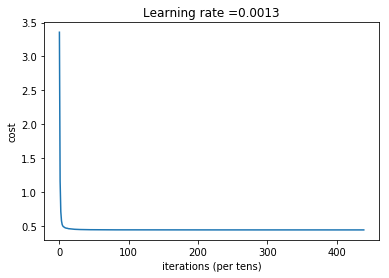

Parameters have been trained!
Train Accuracy: 0.908611
Test Accuracy: 0.929787


In [122]:
# Testing diff layer 40, 40, 40, 40, 40 beta = 0.05
parameters = model(trainX, trainY, testX,testY, beta = 0.05, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.867746
Cost after epoch 100: 0.390756
Cost after epoch 200: 0.375028
Cost after epoch 300: 0.373966
Cost after epoch 400: 0.361777
Cost after epoch 500: 0.364289
Cost after epoch 600: 0.365990
Cost after epoch 700: 0.361809
Cost after epoch 800: 0.357968
Cost after epoch 900: 0.365275
Cost after epoch 1000: 0.356614
Cost after epoch 1100: 0.361148
Cost after epoch 1200: 0.359623
Cost after epoch 1300: 0.362264
Cost after epoch 1400: 0.356663
Cost after epoch 1500: 0.358602
Cost after epoch 1600: 0.357478
Cost after epoch 1700: 0.361198
Cost after epoch 1800: 0.359171
Cost after epoch 1900: 0.357956
Cost after epoch 2000: 0.358566
Cost after epoch 2100: 0.358035


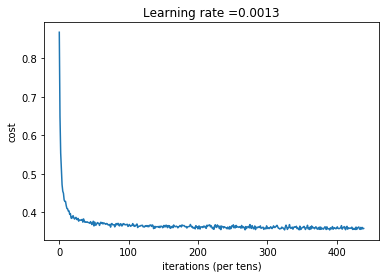

Parameters have been trained!
Train Accuracy: 0.916006
Test Accuracy: 0.92766


In [123]:
# Testing diff layer 40, 40, 40, 40, 40 beta = 0.005
parameters = model(trainX, trainY, testX,testY, beta = 0.005, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.867746
Cost after epoch 100: 0.390756
Cost after epoch 200: 0.375028
Cost after epoch 300: 0.373966
Cost after epoch 400: 0.361777
Cost after epoch 500: 0.364289
Cost after epoch 600: 0.365990
Cost after epoch 700: 0.361809
Cost after epoch 800: 0.357968
Cost after epoch 900: 0.365275
Cost after epoch 1000: 0.356614
Cost after epoch 1100: 0.361148
Cost after epoch 1200: 0.359623
Cost after epoch 1300: 0.362264
Cost after epoch 1400: 0.356663
Cost after epoch 1500: 0.358602
Cost after epoch 1600: 0.357478
Cost after epoch 1700: 0.361198
Cost after epoch 1800: 0.359171
Cost after epoch 1900: 0.357956
Cost after epoch 2000: 0.358566
Cost after epoch 2100: 0.358035


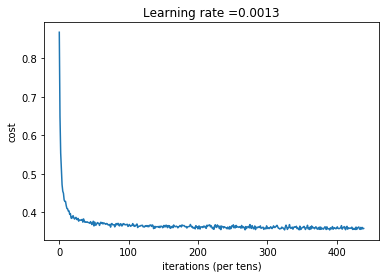

Parameters have been trained!
Train Accuracy: 0.916006
Test Accuracy: 0.92766


In [124]:
# Testing diff layer 40, 40, 40, 40, 40 beta = 0.001
parameters = model(trainX, trainY, testX,testY, beta = 0.005, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.573027
Cost after epoch 100: 0.296877
Cost after epoch 200: 0.263436
Cost after epoch 300: 0.234544
Cost after epoch 400: 0.205698
Cost after epoch 500: 0.190367
Cost after epoch 600: 0.185462
Cost after epoch 700: 0.158877
Cost after epoch 800: 0.146899
Cost after epoch 900: 0.160974
Cost after epoch 1000: 0.145781
Cost after epoch 1100: 0.138912
Cost after epoch 1200: 0.134734
Cost after epoch 1300: 0.124295
Cost after epoch 1400: 0.109143
Cost after epoch 1500: 0.103410
Cost after epoch 1600: 0.110973
Cost after epoch 1700: 0.100689
Cost after epoch 1800: 0.106798
Cost after epoch 1900: 0.096486
Cost after epoch 2000: 0.123135
Cost after epoch 2100: 0.090150


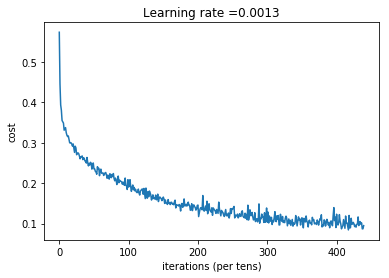

Parameters have been trained!
Train Accuracy: 0.979398
Test Accuracy: 0.942553


In [125]:
# Testing diff layer 40, 40, 40, 40, 40 beta = 0.0001
parameters = model(trainX, trainY, testX,testY, beta = 0.0001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.567495
Cost after epoch 100: 0.284734
Cost after epoch 200: 0.253665
Cost after epoch 300: 0.216021
Cost after epoch 400: 0.190315
Cost after epoch 500: 0.162800
Cost after epoch 600: 0.160612
Cost after epoch 700: 0.130653
Cost after epoch 800: 0.132635
Cost after epoch 900: 0.132602
Cost after epoch 1000: 0.123134
Cost after epoch 1100: 0.100510
Cost after epoch 1200: 0.102144
Cost after epoch 1300: 0.118160
Cost after epoch 1400: 0.092865
Cost after epoch 1500: 0.081124
Cost after epoch 1600: 0.082127
Cost after epoch 1700: 0.079492
Cost after epoch 1800: 0.067885
Cost after epoch 1900: 0.077274
Cost after epoch 2000: 0.075774
Cost after epoch 2100: 0.076400


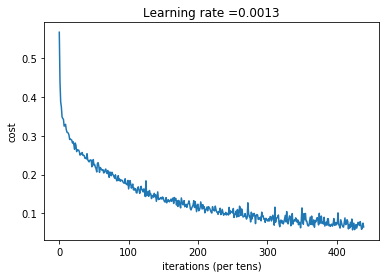

Parameters have been trained!
Train Accuracy: 0.984152
Test Accuracy: 0.931915


In [126]:
# Testing diff layer 40, 40, 40, 40, 40 beta = 0.00001
parameters = model(trainX, trainY, testX,testY, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.566880
Cost after epoch 100: 0.287069
Cost after epoch 200: 0.255541
Cost after epoch 300: 0.215471
Cost after epoch 400: 0.186739
Cost after epoch 500: 0.162571
Cost after epoch 600: 0.160089
Cost after epoch 700: 0.130347
Cost after epoch 800: 0.126304
Cost after epoch 900: 0.124701
Cost after epoch 1000: 0.120307
Cost after epoch 1100: 0.102925
Cost after epoch 1200: 0.095911
Cost after epoch 1300: 0.129394
Cost after epoch 1400: 0.089096
Cost after epoch 1500: 0.088763
Cost after epoch 1600: 0.073092
Cost after epoch 1700: 0.088863
Cost after epoch 1800: 0.075621
Cost after epoch 1900: 0.080136
Cost after epoch 2000: 0.075632
Cost after epoch 2100: 0.062745


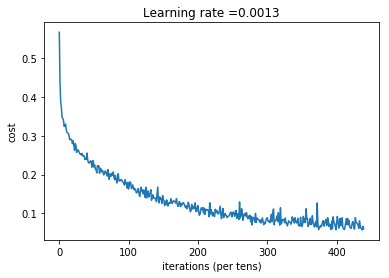

Parameters have been trained!
Train Accuracy: 0.974643
Test Accuracy: 0.929787


In [127]:
# Testing diff layer 40, 40, 40, 40, 40 beta = 0
parameters = model(trainX, trainY, testX,testY, beta = 0, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)